## 폴더 경로 확인 및 변경

In [1]:
import os
os.getcwd()

'c:\\jupyter\\capston\\bald\\dandruff'

In [2]:
# 폴더 경로 변경 코드

# os.chdir()

In [1]:
import os, glob, random
import numpy as np
from PIL import Image

datapath = "C:/jupyter/capston/bald/data/dandruff" # 훈련 데이터 경로
output = "dandruffLoss.npz"  # 저장할 파일 이름

image_w = 256
image_h = 256

x = []                    # Image
y = []                    # Label

# 폴더에 있는 이미지 데이터 읽기
# path를 통해 경로를 설정해주고, label을 통해 해당 이미지에 대한 라벨값을 지정해준다
# 예를 들어 양호 카테고리 이미지들은 0을 받아 지정해준다.
def glob_files(path, label):
    files = glob.glob(path + "/*.jpg")
    random.shuffle(files)
    
    # 이미지 데이터 처리
    # 함수를 호출할 때마다 반복을 통해 데이터를 x,y 배열에 계속 집어넣는다.
    num = 0
    max_photo = 534            # normal, mild, moderate, severe 중 가장 작은 이미지 개수로 설정
    for i, f in enumerate(files):
        if num >= max_photo:   # max_photo 값보다 커질 경우, 루프 벗어남.
            break
        num += 1
        
        # 이미지 데이터 읽기
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))  # 이미지 사이즈 256 * 256 설정
        img = np.asarray(img)        # RGB 색상값 0부터 1까지의 실수값 변환
        x.append(img)
        y.append(label)
        
        if i % 100 == 0:
            print("run: " + f)

# 바꾼 코드 !!
# 폴더에 있는 이미지 데이터 읽고 레이블 지정
# 반복문을 통해 양호, 경증, 중등도, 중증 이미지를 가져온다.
# 또한 glob_files 함수를 호출할 때 각각의 라벨을 지정한다.
# i = 0 -> 양호, ... i = 3 -> 중증
categories = ['normal', 'mild', 'moderate', 'severe']
def main():
    for i in range(4): 
        file = datapath + "/" + categories[i]
        print(categories[i] + " 실행")
        glob_files(file, i)
        
    # 파일로 저장
    np.savez(output, x=x, y=y) # Numpy 압축파일로 저장
    print(str(len(x)) + "개의 이미지를 저장했습니다. 파일명: " + output)
    
# 메인 프로그램 실행
# main() 함수를 실행하고 그 안에 있는 glob_files()함수를 통해 양호 경증 중증도 중증 순으로 함수를 다시 호출한다
# glob_files()함수를 통해 x, y배열에 데이터를 다 집어넣고
# np.savez를 통해 .npz형식의 데이터 배열 파일을 저장하게 된다.
if __name__ == '__main__':
    main()

2136개의 이미지를 저장했습니다. 파일명: dandruffLoss.npz


<function matplotlib.pyplot.show(close=None, block=None)>

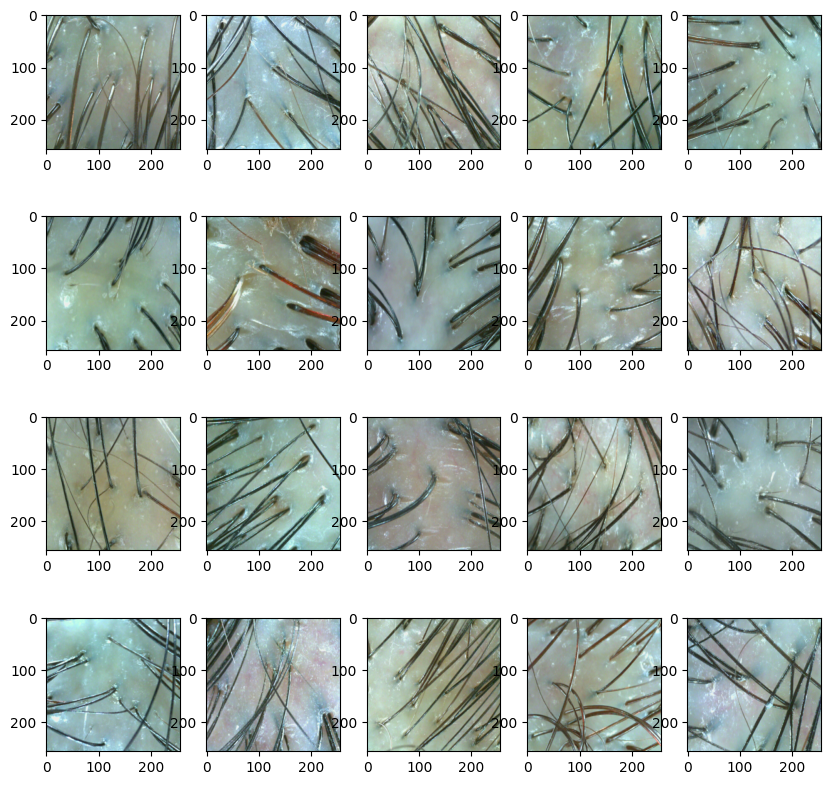

In [2]:
import matplotlib.pyplot as plt

# 이미지 확인
# np.load를 통해 배열 데이터를 가져오고 이를 photos변수에 집어넣는다
# photos 배열 데이터의 x= 이미지 y= 라벨을 각각 집어넣는다.
photos = np.load("dandruffLoss.npz")
x = photos["x"]
y = photos["y"]

# 시작 인덱스 설정
# 왜 필요한거지? i 값이 1씩 증가하면서 이미지를 가져오는거 같은데
idx = 0  

# subplot으로 인덱스로 설정한 이미지 출력
# plt.figure을 통해 최초 창의 크기를 가로 세로 9인치로 설정한다.
# 20번 반복해서 4행 5열 i+1번째에 이미지를 imshow를 통해 가져와서 출력한다.
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x[i+idx])
    
plt.show

In [3]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# npz 파일을 불러와 데이터셋 구분
def preprocessing(file, hairClass):
    global shape, x_train, y_train, x_val, y_val, x_test, y_test
    rows = 256                 # 이미지 높이
    cols = 256                 # 이미지 너비
    color = 3                  # 이미지 색공간
    shape = (rows, cols, color)
    hairClass = hairClass      # 출력 데이터 수
    
    # 사진 데이터 읽기
    # 데이터를 읽은 후 해당 파일의 x(이미지)는 x에  y(라벨 0,1,2,3)은 y에 넣는다.
    photo = np.load(file)
    x = photo['x']
    y = photo['y']
    
    # 데이터 1차원에서 3차원 배열로 변환 및 정규화
    x = x.reshape(-1, rows, cols, color)
    x = x.astype('float32') / 255
    
    # 레이블 One-Hot Encoding 변환
    y = to_categorical(y.astype('int32'), hairClass)
    
    # 전체 데이터셋 -> 학습 데이터셋과 테스트 데이터셋으로 구분
    x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                        test_size=0.2)
    
    # 훈련 데이터셋 -> 학습 데이터셋과 검증 데이터셋으로 구분
    # 만약 train_test_split의 test_size속성이 생략되어 있다면 해당 default값은 0.25이다.
    # 만약 train_test_split의 shuffle속성이 생략되어 있다면 해당 default값은 True이다.
    # 즉 데이터셋를 알아서 섞게 된다.
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                      test_size=0.2)
    
    # 데이터셋 확인
    print(x_train.shape, y_train.shape)
    print(x_val.shape, y_val.shape)
    print(x_test.shape, y_test.shape)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam

# CNN 모델 정의
# hairClass 최종적으로 신경망이 몇 개의 출력을 가지게 되는지 즉 4개의 유형이 존재하니 4를 받게 된다
# 헤어 input_shape를 받게 되며 256, 256, 3을 받게 된다 -> 가로 세로 256픽셀의 이미지 데이터(3)

# Dropout을 통해 해당 퍼센트값만큼 해당 노드들은 사용하지 않고 나머지만 다음으로 넘어간다.

# Conv2D를 통해 커널 사이즈를 3*3으로 잡아 연산한다.

# MaxPooling2D를 통해 stride값만큼 이동하며 2*2씩 연산하게 된다.
# stride값이 없다면 기본 2*2칸씩 이동하게 된다.

# flatten을 통해 이미지 배열을 1차원으로 평탄화시켜준다.
# 예를 들어 이미지가 [[1,1,1,1,1,],[1,1,1,1,0,1,0,], ....]으로 구성되있으면 이를 [1 1 1 1 1 0 0 0 1 1 0 ...]으로 평탄화시킨다.

# 출력 카테고리가 3개 이상인 경우 softmax를 사용한다. 양호, 경증, 중등도, 중증 4개임
def def_model(shape, hairClass):
    model = Sequential()
    model.add(Conv2D(32, input_shape=shape, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(hairClass, activation='softmax'))
    
    model.summary() # 모델 요약
    return model

# 모델 컴파일 후 반환
def get_model(shape, hairClass):
    model = def_model(shape, hairClass)
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    return model

In [5]:
# 데이터셋 구분 확인
# preprocessing을 통해 
preprocessing('dandruffLoss.npz', 4)

(1366, 256, 256, 3) (1366, 4)
(342, 256, 256, 3) (342, 4)
(428, 256, 256, 3) (428, 4)


In [6]:
# CNN 모델 생성 및 학습
test1 = get_model((256,256,3), 4)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0

In [ ]:
#from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
#model_dir = './model' # 모델이 저장될 경로 체크
    
#if not os.path.exists(model_dir): # 해당 위치에 경로(폴더)가 없으면
#    os.mkdir(model_dir) # 변수명 model_dir로 생성시킴
    
#model_path = model_dir + '/dandruff.model' # 생성시킬 모델명과 경로 융합
    
# ModelCheckpoint란 모델을 저장할 때 사용하는 콜백 함수이다.
# filepath -> 모델 저장 경로
# monitor -> 모델 저장 시 기준이 되는 값으로 해당 코드에서는 val_loss을 저장하게 된다
# verbose -> 1=저장되었다는 코맨트 0=코맨트 없음
# save_besr_only -> monitor되는 값을 기준으로 가장 좋은 값을 저장한다.
#checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    
# EarlyStopping이란 특정 시점에서 훈련을 멈추는 콜백 함수이다.
# monitor -> 모니터링할 값
# mode -> 관찰항목에 대해 개선이 없다고 판단하기 위한 기준을 설정한다. 
# monitor에서 설정한 항목이 val_loss 이면 값이 감소되지 않을 때 종료하여야 하므로 min을 설정한다. 입력하지 않으면 auto로 설정해 알아서 판단해준다.
# patience -> 15번 이상 변동 없으면 중지시킨다.
#early_stopping = EarlyStopping(monitor='val_loss', patience=15)

In [7]:
# x_train, y_train 데이터셋을 가져온다.

# batch_size를 32로 지정해줌으로써 전체 데이터를 32씩 나눠서 훈련시킨다.

# epochs를 20으로 지정해줌으로써 전체 데이터를 20번 반복훈련시킨다.
# 즉 32씩 나눠 훈련시키고 -> 이를 20번 반복하게 된다.

# verbose를 통해 콜백의 수행 과정 노출 여부를 지정하게 된다
# 0(아무런 표시하지 않음), 1(프로그래스바로 나타남), 2(각 에폭마다 수행과정을 설명)

# validation(검증)을 수행할 때 validation_data를 통해 x_test, y_test값을 사용하게 된다.
hist1 = test1.fit(x_train, y_train,
                  batch_size=32,
                  epochs=20,
                  verbose=1,
                  validation_data=(x_test, y_test))

Epoch 1/20
43/43 [==============================] - 114s 3s/step - loss: 2.9283 - accuracy: 0.2562 - val_loss: 1.3863 - val_accuracy: 0.2640
Epoch 2/20
43/43 [==============================] - 114s 3s/step - loss: 1.3865 - accuracy: 0.2357 - val_loss: 1.3862 - val_accuracy: 0.2640
Epoch 3/20
43/43 [==============================] - 117s 3s/step - loss: 1.3865 - accuracy: 0.2430 - val_loss: 1.3861 - val_accuracy: 0.2640
Epoch 4/20
43/43 [==============================] - 116s 3s/step - loss: 1.3863 - accuracy: 0.2511 - val_loss: 1.3861 - val_accuracy: 0.2640
Epoch 5/20
43/43 [==============================] - 113s 3s/step - loss: 1.3866 - accuracy: 0.2401 - val_loss: 1.3862 - val_accuracy: 0.2640
Epoch 6/20
43/43 [==============================] - 113s 3s/step - loss: 1.3864 - accuracy: 0.2401 - val_loss: 1.3862 - val_accuracy: 0.2523
Epoch 7/20
43/43 [==============================] - 113s 3s/step - loss: 1.3863 - accuracy: 0.2657 - val_loss: 1.3861 - val_accuracy: 0.2640
Epoch 8/20
43

In [8]:
# 모델 평가
# x_test, y_test 데이터셋을 통해 모델을 테스트하게 된다.
score1 = test1.evaluate(x_test, y_test, verbose=1)
print("정답률: ", score1[1], 'loss: ', score1[0])

14/14 [==============================] - 4s 295ms/step - loss: 1.3860 - accuracy: 0.2640
정답률:  0.2640186846256256 loss:  1.3860256671905518


## 이미지 증식

In [ ]:
# 이미지 증식을 위한 라이브러리 호출

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 20,
#     width_shift_range = 0.2,
#     height_shift_range = 0.2,
#     zoom_range = 0.1,
#     vertical_flip = True,
#     horizontal_flip = True,
#     channel_shift_range = 50,
    fill_mode = 'nearest',
    brightness_range = [0.7, 1.3]
)

# rotation_range = 20 : 폴더에서 이미지 데이터를 가져올 때 회전시키는 지정된 각도의 영역
# width_shift_range : 오른쪽이든, 왼쪽이든 가로방향으로 이동, 0.1은 비율 10%
# height_shift_range : 지정된 이동 범위 내(% 비율)에서 원본 이미지를 위아래 이동
# zoom_range : 지정된 이동 범위 내(% 비율)에서 원본 이미지를 확대/축소
# vertical_flip = True : 무작위로 수직 반전(위아래) 뒤집기를 합니다.
# horizontal_flip = True : 무작위로 수평방향으로 뒤집기를 합니다.
# fill_mode = 'nearest' : 이미지의 빈 공간 채우기(제일 근접한 픽셀로 채우기 -> nearest)
# channel_shift_range = 50 : 무작위 채널 이동
# brightness_range = [0.7, 1.3] : 밝기 70% ~ 130%로 변경